# Step 1: Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Display the first few rows of the dataframe
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Check the structure of the dataframe
df.info()

# Display basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
# Check for missing values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Numerical Variables

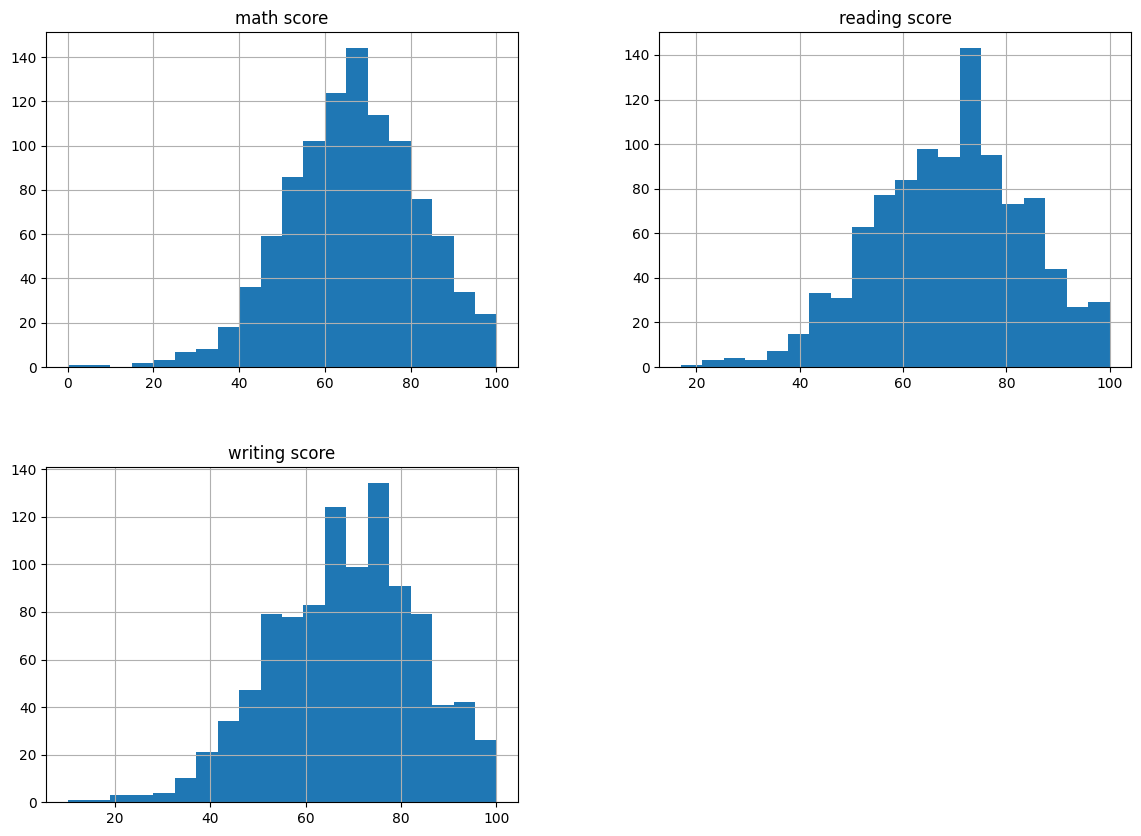

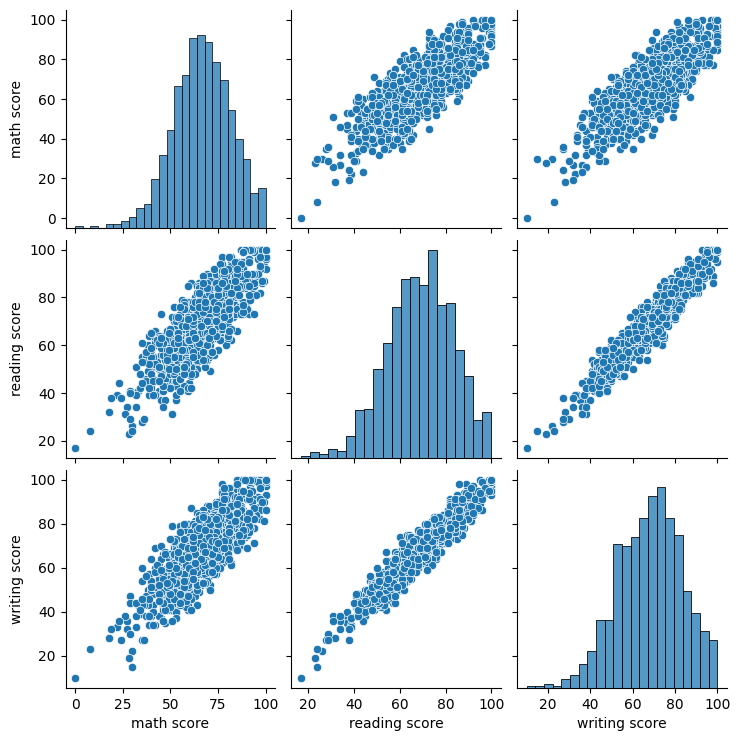

In [4]:
# Histograms
df.hist(bins=20, figsize=(14,10))
plt.show()

# Pairplot to see the relationship between scores
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()


Categorical Variables

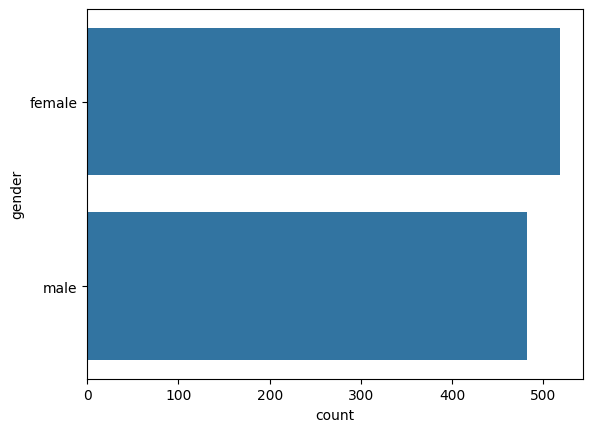

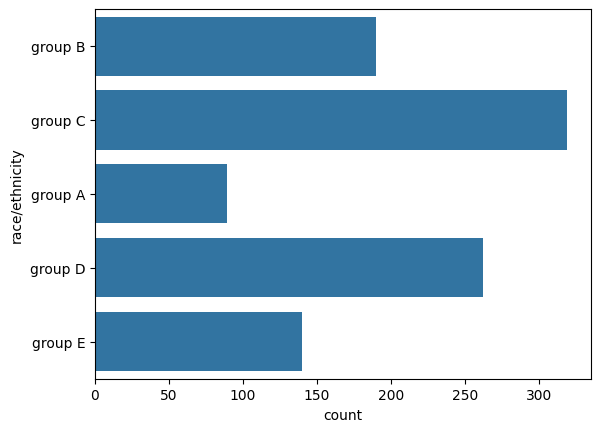

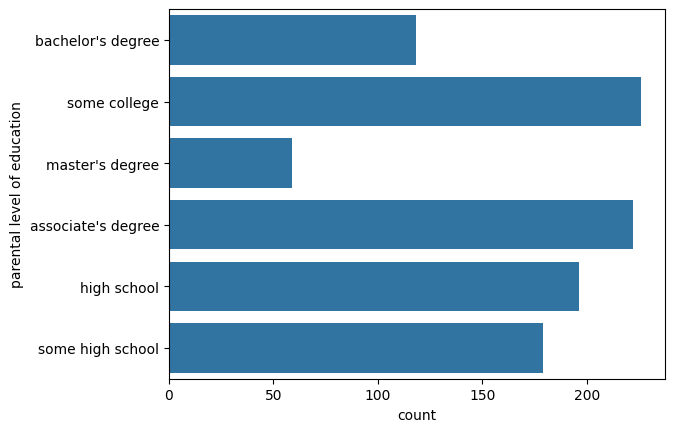

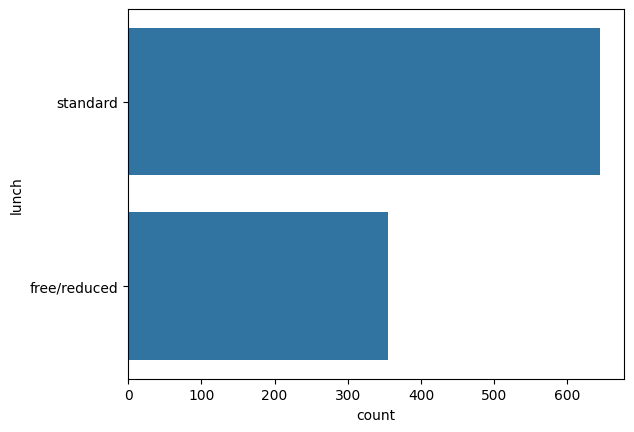

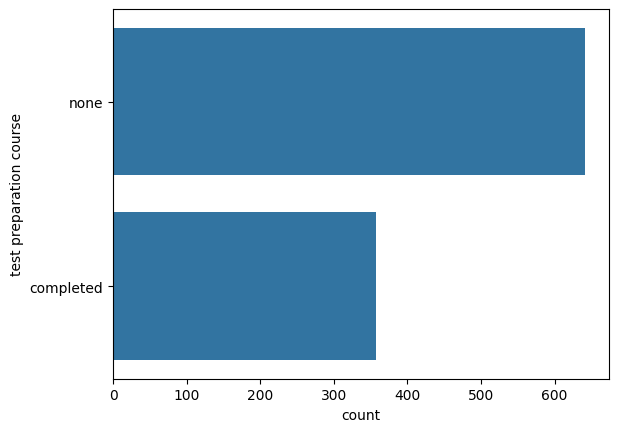

In [5]:
# Count plots for categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for column in categorical_columns:
    sns.countplot(y=column, data=df)
    plt.show()


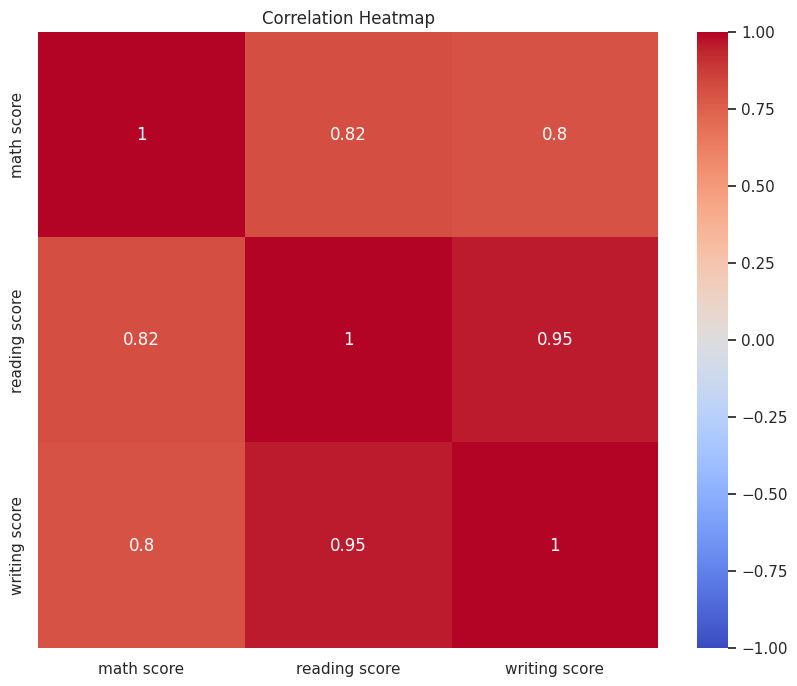

In [54]:
# Drop non-numeric columns if not needed for correlation analysis
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix using the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


# Step 2: Data Cleaning and Preprocessing

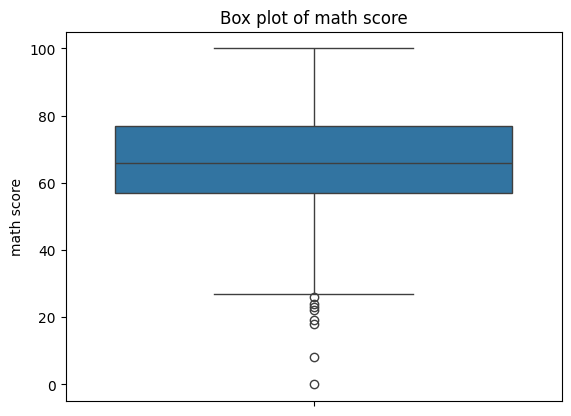

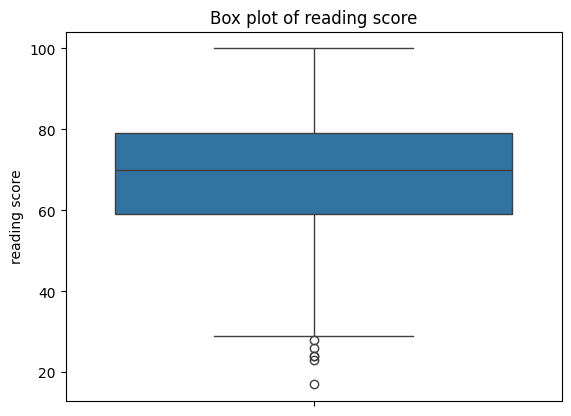

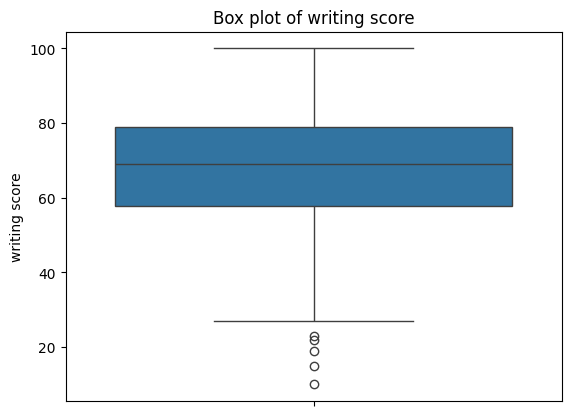

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
numerical_columns = ['math score', 'reading score', 'writing score']
for column in numerical_columns:
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [8]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[numerical_columns])

# Create a DataFrame to hold the Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold) | (z_scores_df < -threshold)

# Summarize the number of outliers in each column
print(outliers.sum())


math score       4
reading score    4
writing score    4
dtype: int64


In [9]:
# Remove outliers by filtering them out
# For each column, we'll keep only the rows where the absolute Z-score is less than the threshold
filtered_df = df[(z_scores_df < threshold).all(axis=1)]

# Alternatively, you can cap outliers at a certain threshold
# df['column_name'] = np.where(df['column_name'] > upper_limit, upper_limit, df['column_name'])
# df['column_name'] = np.where(df['column_name'] < lower_limit, lower_limit, df['column_name'])


In [10]:
# Check the structure and summary statistics again
filtered_df.info()
filtered_df.describe()

# Check for remaining missing values
filtered_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Step 3: Basic Statistical Analysis

In [53]:
# Calculate summary statistics
summary_statistics = df.describe()
print(summary_statistics)

# Calculate median
medians = df.select_dtypes(include='number').median()
print("Medians:\n", medians)

# Calculate mode
modes = df.select_dtypes(include='number').mode().iloc[0]
print("Modes:\n", modes)

# Calculate standard deviation
std_devs = df.select_dtypes(include='number').std()
print("Standard Deviations:\n", std_devs)


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
Medians:
 math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
Modes:
 math score       65
reading score    72
writing score    74
Name: 0, dtype: int64
Standard Deviations:
 math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


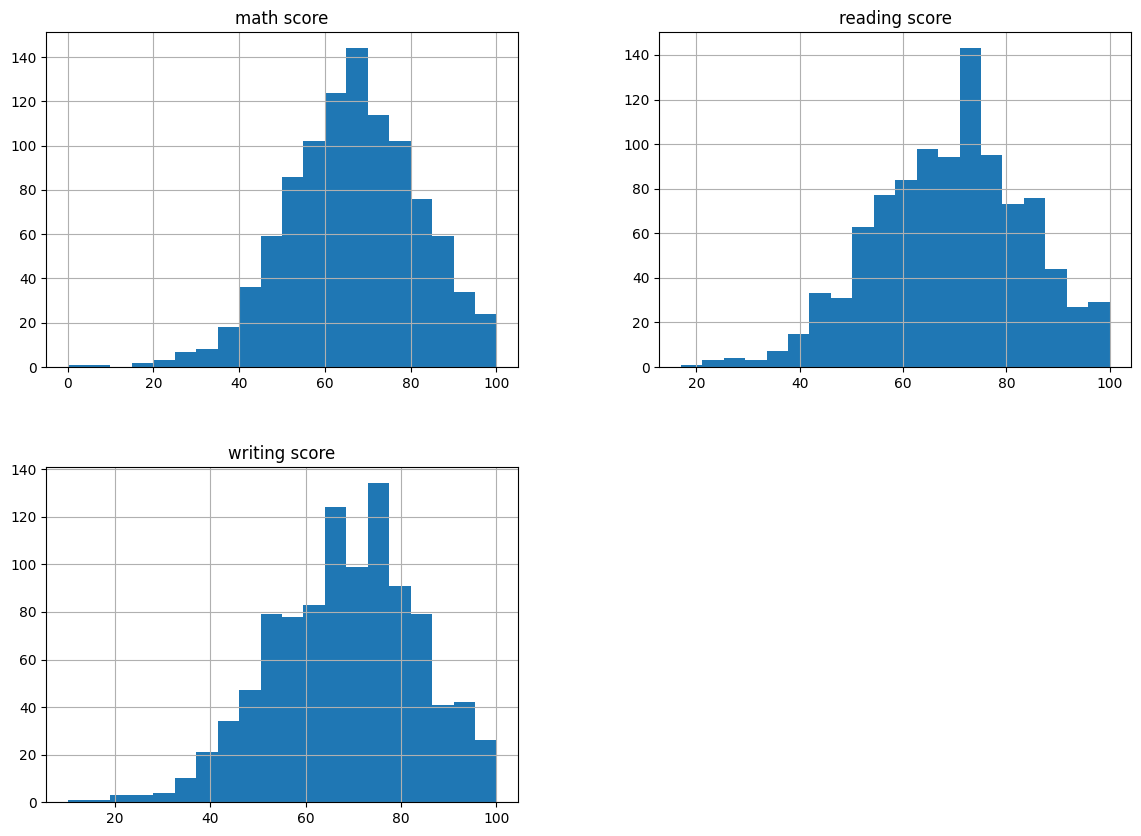

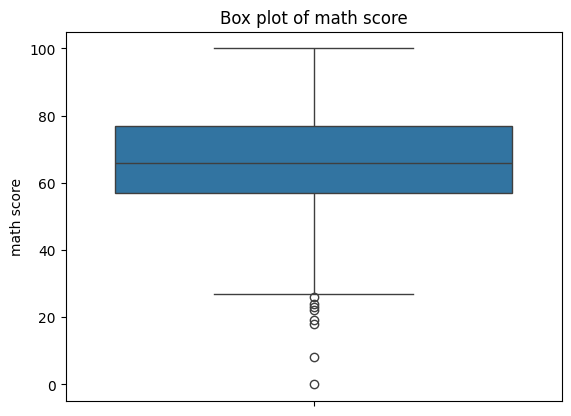

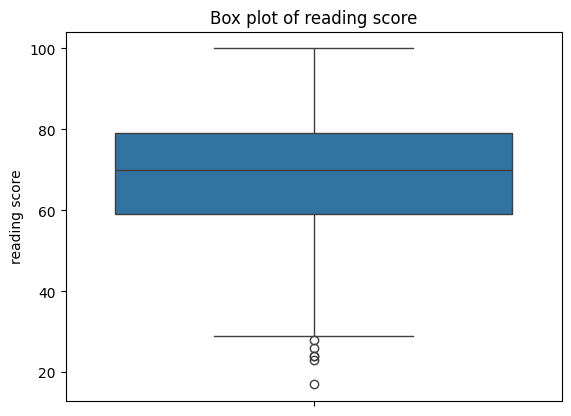

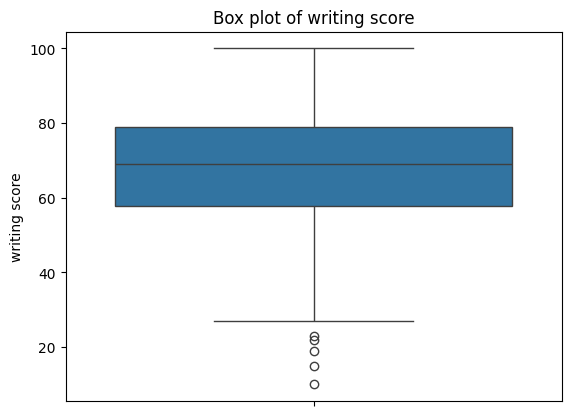

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=20, figsize=(14, 10))
plt.show()

# Box plots
numerical_columns = ['math score', 'reading score', 'writing score']
for column in numerical_columns:
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


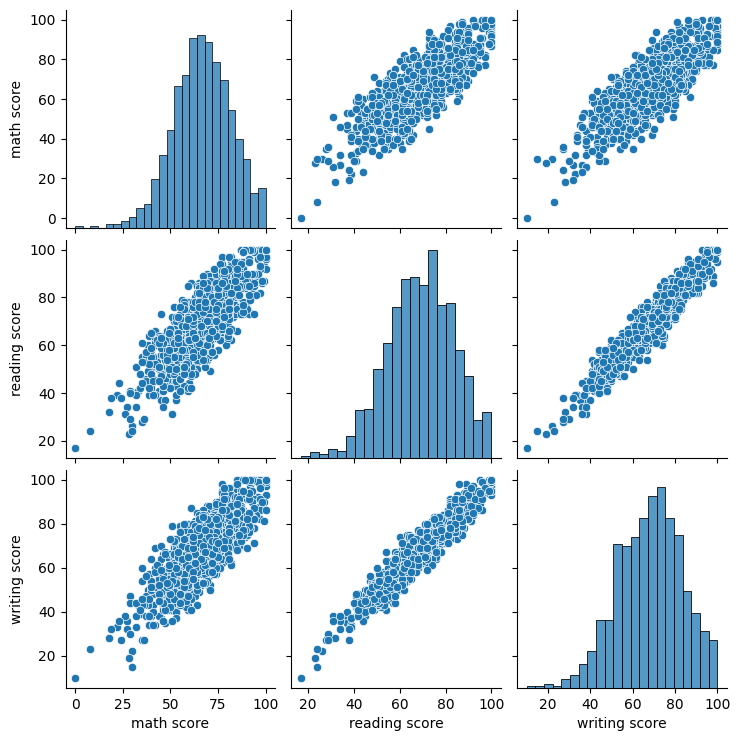

In [13]:
# Scatter plot matrix
sns.pairplot(df[numerical_columns])
plt.show()


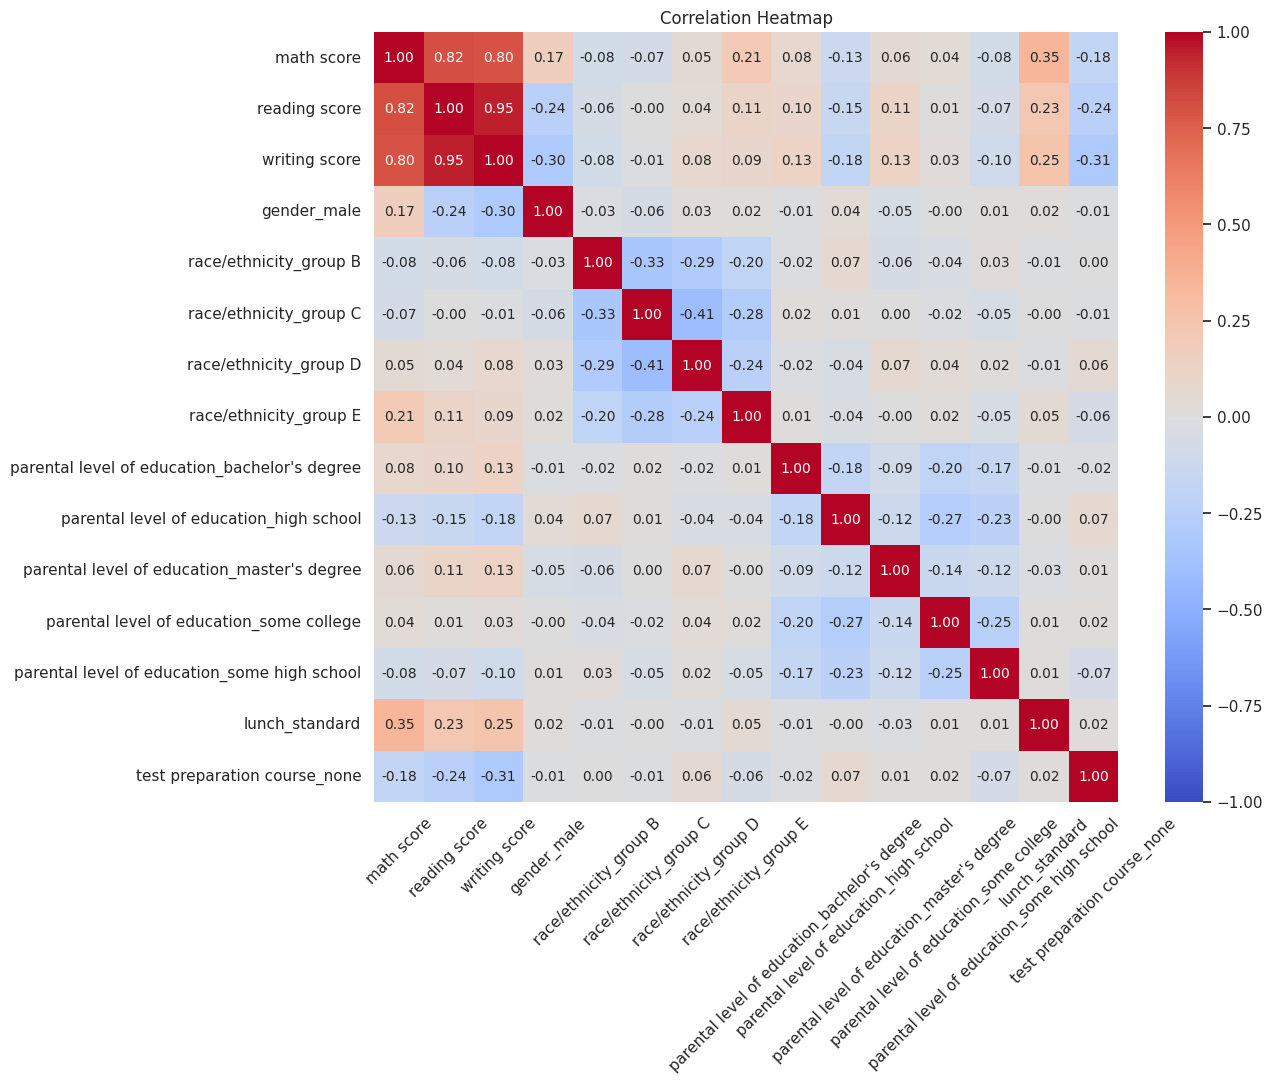

In [52]:
# Round the correlation coefficients to 2 decimal places
correlation_matrix_rounded = correlation_matrix.round(2)

# Plot the correlation heatmap with adjusted size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()



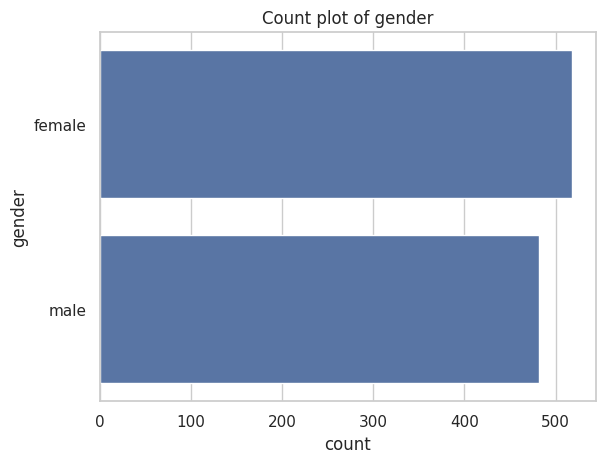

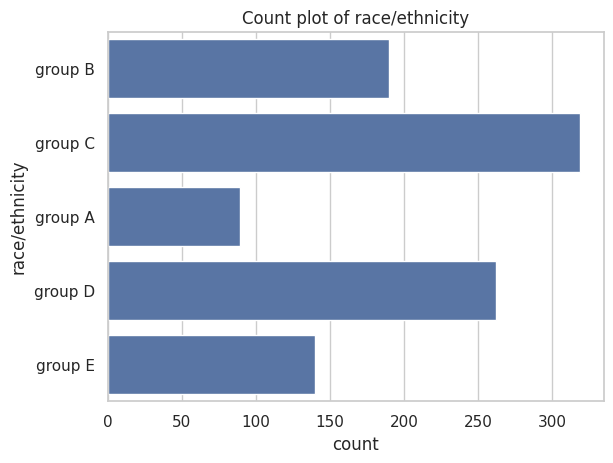

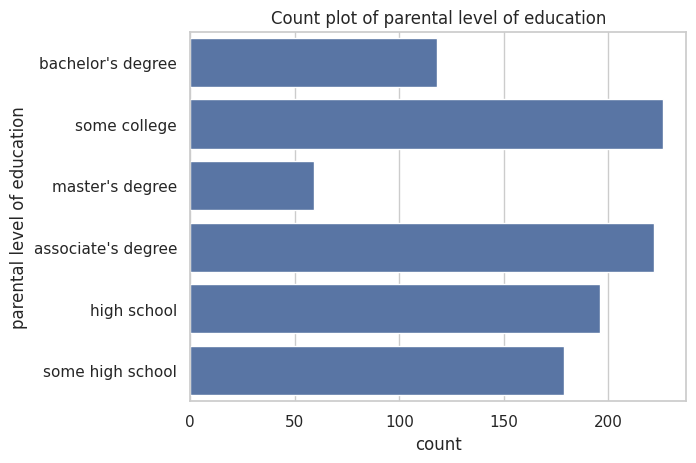

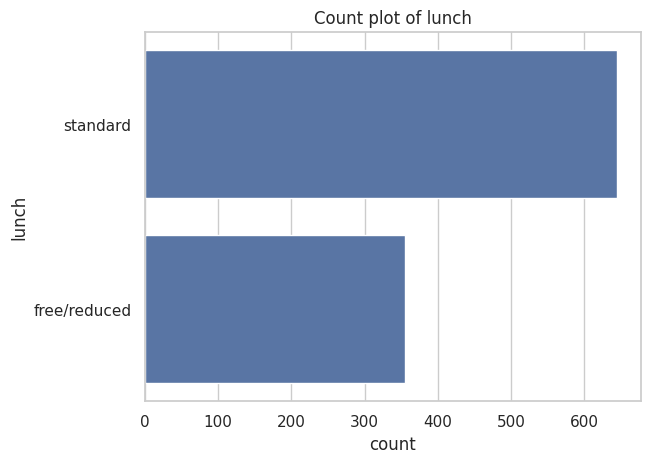

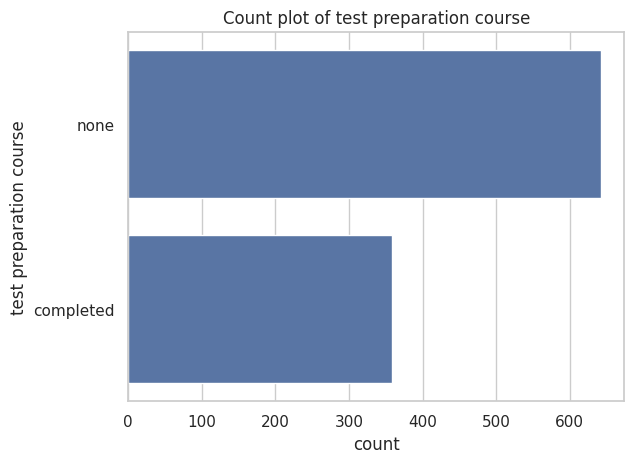

In [49]:
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for column in categorical_columns:
    sns.countplot(y=column, data=df)
    plt.title(f'Count plot of {column}')
    plt.show()


In [16]:
# Group by gender and calculate statistics
grouped_by_gender = df.groupby('gender')[numerical_columns].agg(['mean', 'median', 'std'])
print("Grouped by Gender:\n", grouped_by_gender)


Grouped by Gender:
        math score                   reading score                    \
             mean median        std          mean median        std   
gender                                                                
female  63.633205   65.0  15.491453     72.608108   73.0  14.378245   
male    68.728216   69.0  14.356277     65.473029   66.0  13.931832   

       writing score                    
                mean median        std  
gender                                  
female     72.467181   74.0  14.844842  
male       63.311203   64.0  14.113832  


In [17]:
# Group by parental level of education and calculate statistics
grouped_by_parent_education = df.groupby('parental level of education')[numerical_columns].agg(['mean', 'median', 'std'])
print("Grouped by Parental Level of Education:\n", grouped_by_parent_education)


Grouped by Parental Level of Education:
                             math score                   reading score         \
                                  mean median        std          mean median   
parental level of education                                                     
associate's degree           67.882883   67.0  15.112093     70.927928   72.5   
bachelor's degree            69.389831   68.0  14.943789     73.000000   73.0   
high school                  62.137755   63.0  14.539651     64.704082   66.0   
master's degree              69.745763   73.0  15.153915     75.372881   76.0   
some college                 67.128319   67.5  14.312897     69.460177   70.5   
some high school             63.497207   65.0  15.927989     66.938547   67.0   

                                       writing score                    
                                   std          mean median        std  
parental level of education                                             
associate'

# Step 4: Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set the style for seaborn plots
sns.set(style="whitegrid")


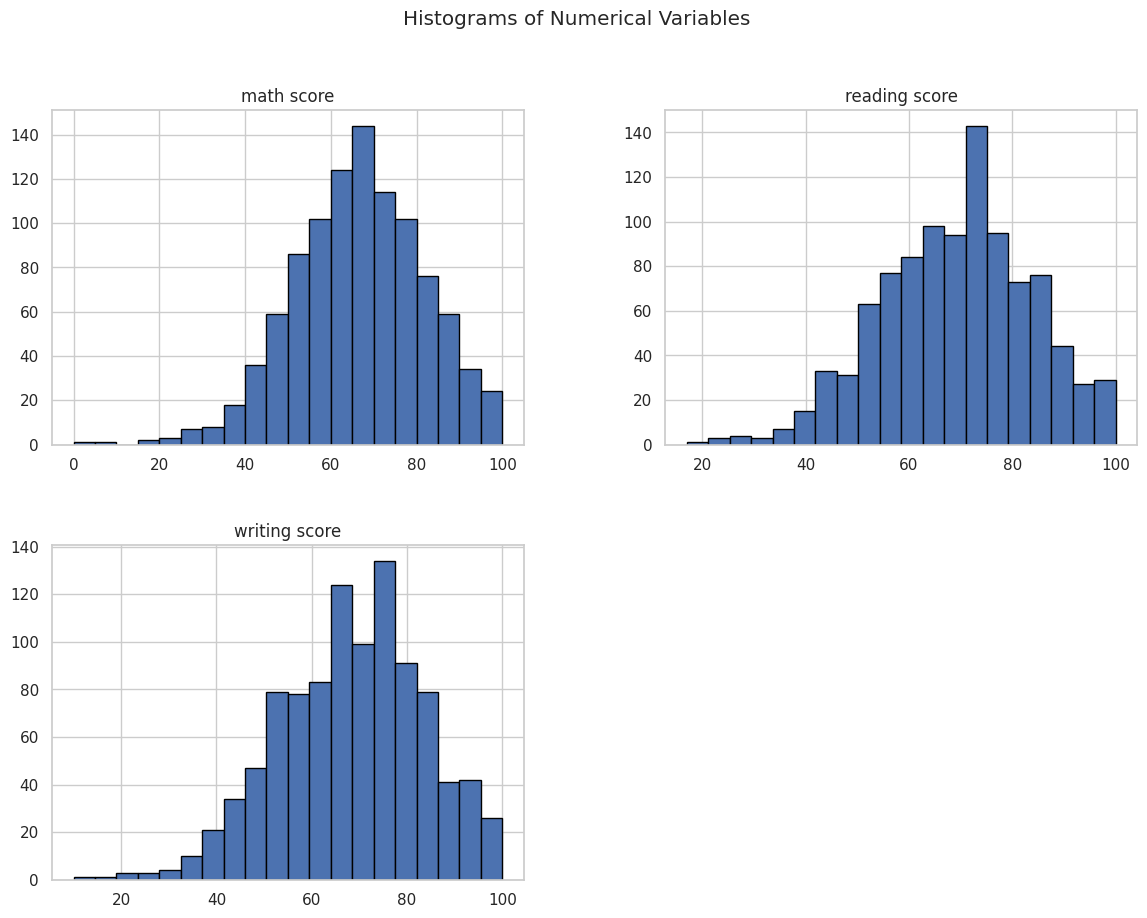

In [19]:
# Histograms for numerical columns
numerical_columns = ['math score', 'reading score', 'writing score']
df[numerical_columns].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()


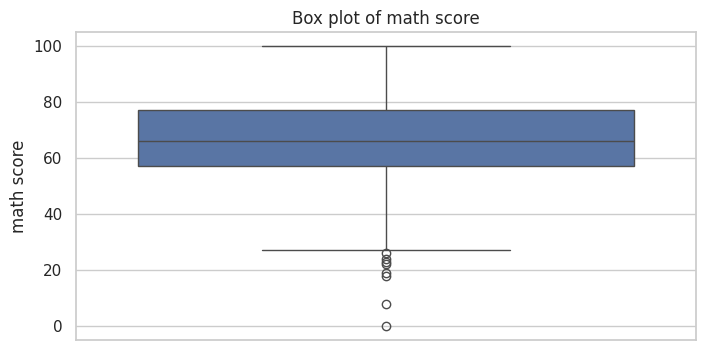

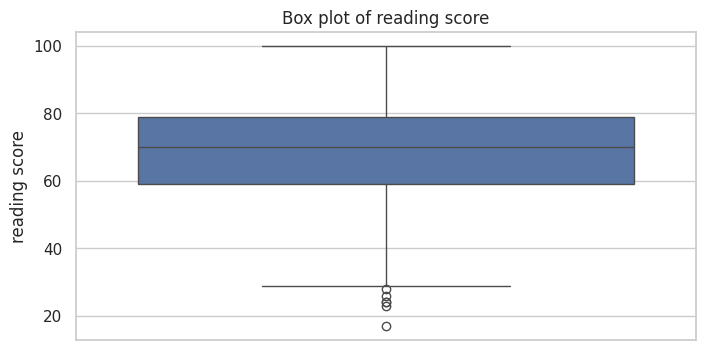

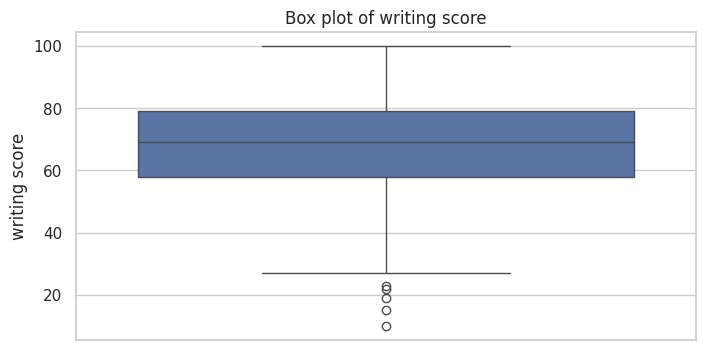

In [20]:
# Box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


<ipython-input-21-2b8f6fdc501a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


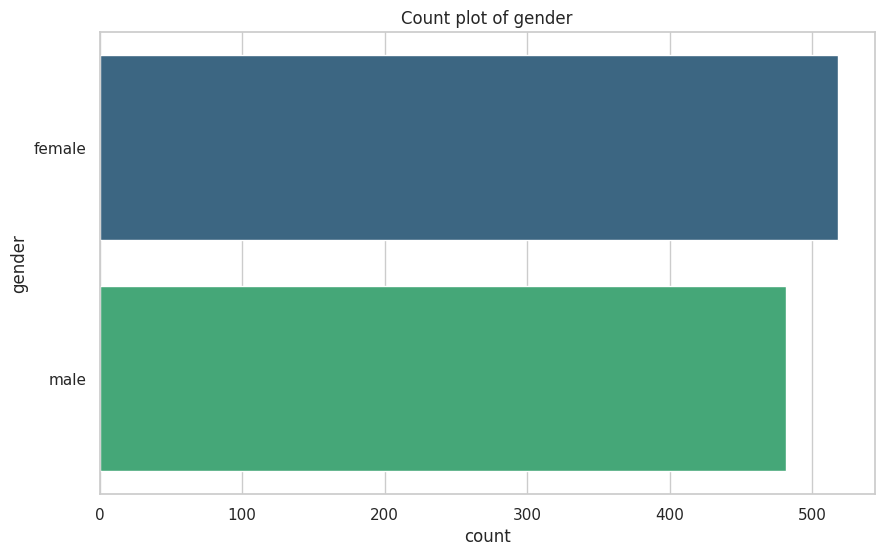

<ipython-input-21-2b8f6fdc501a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


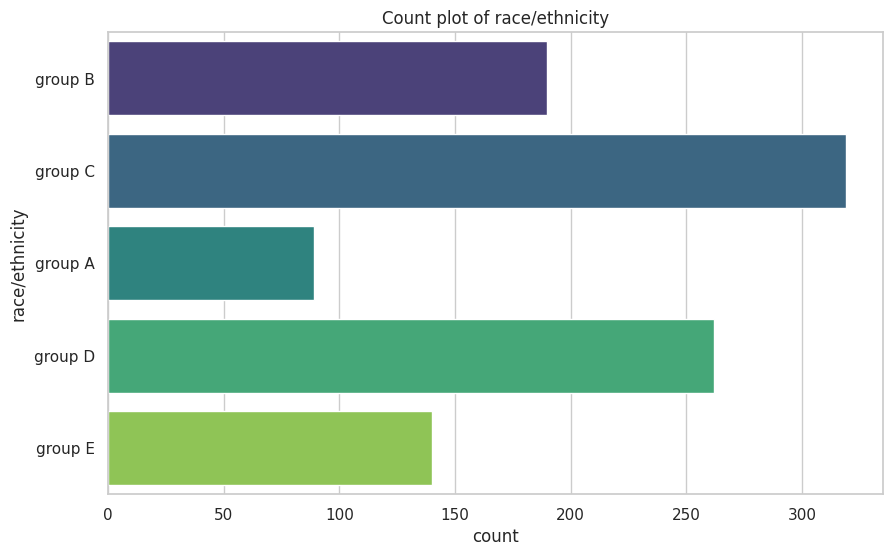

<ipython-input-21-2b8f6fdc501a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


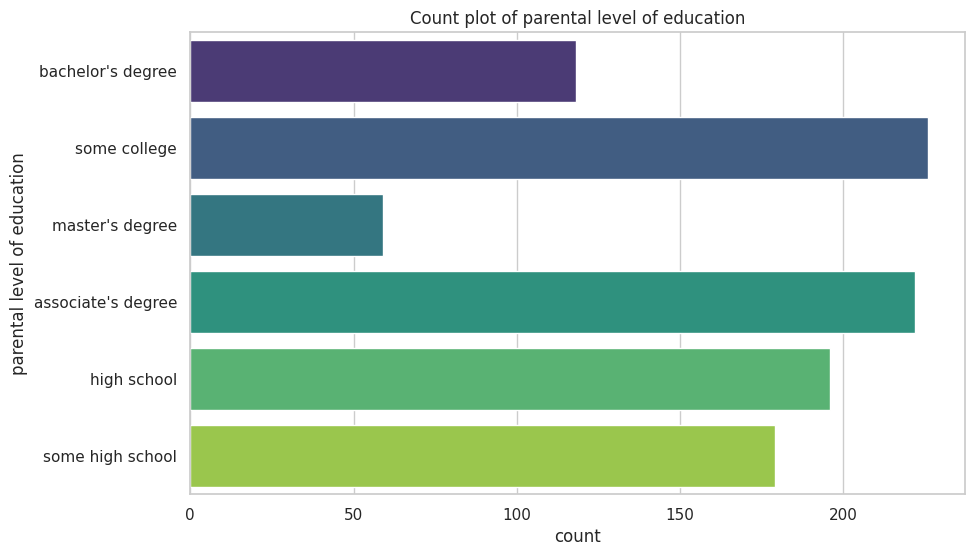

<ipython-input-21-2b8f6fdc501a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


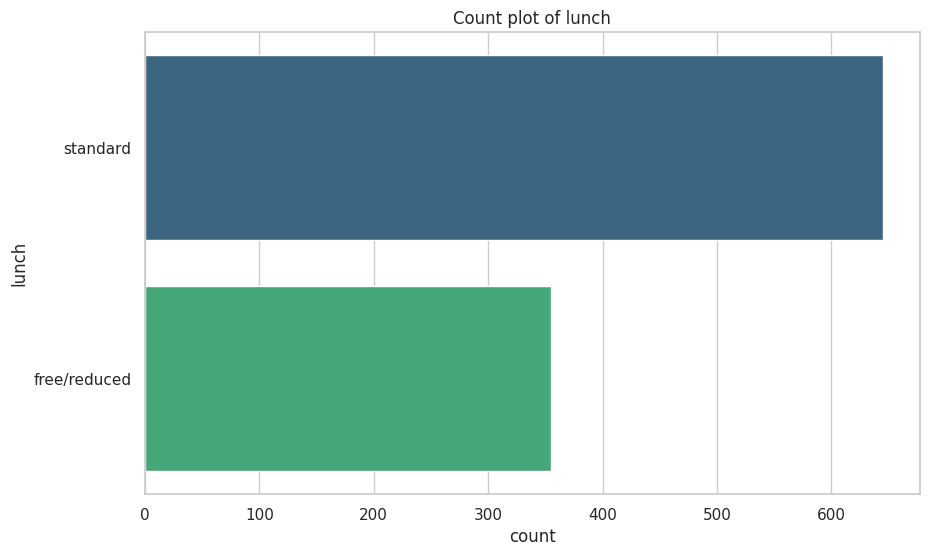

<ipython-input-21-2b8f6fdc501a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


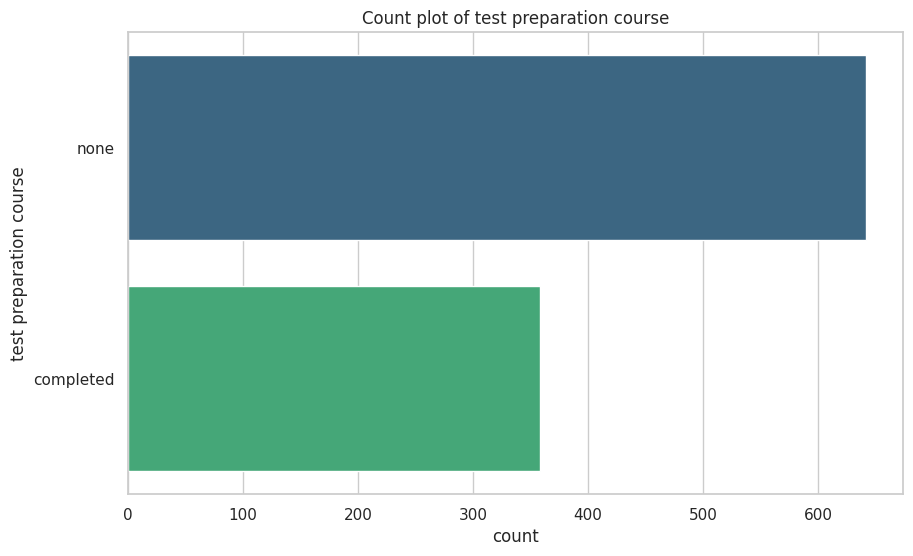

In [21]:
# Count plots for categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Count plot of {column}')
    plt.show()

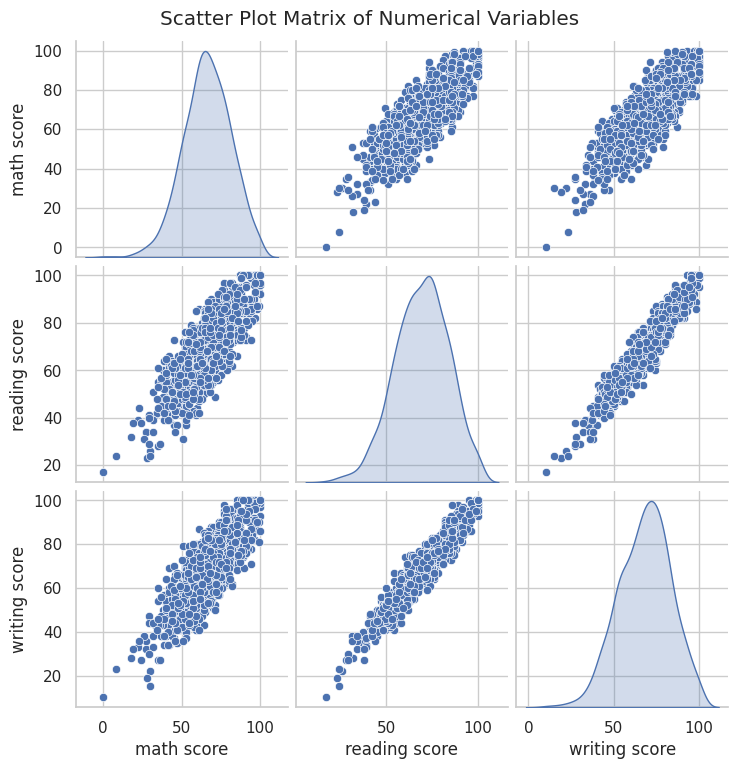

In [22]:
# Scatter plots for pairs of numerical columns
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()


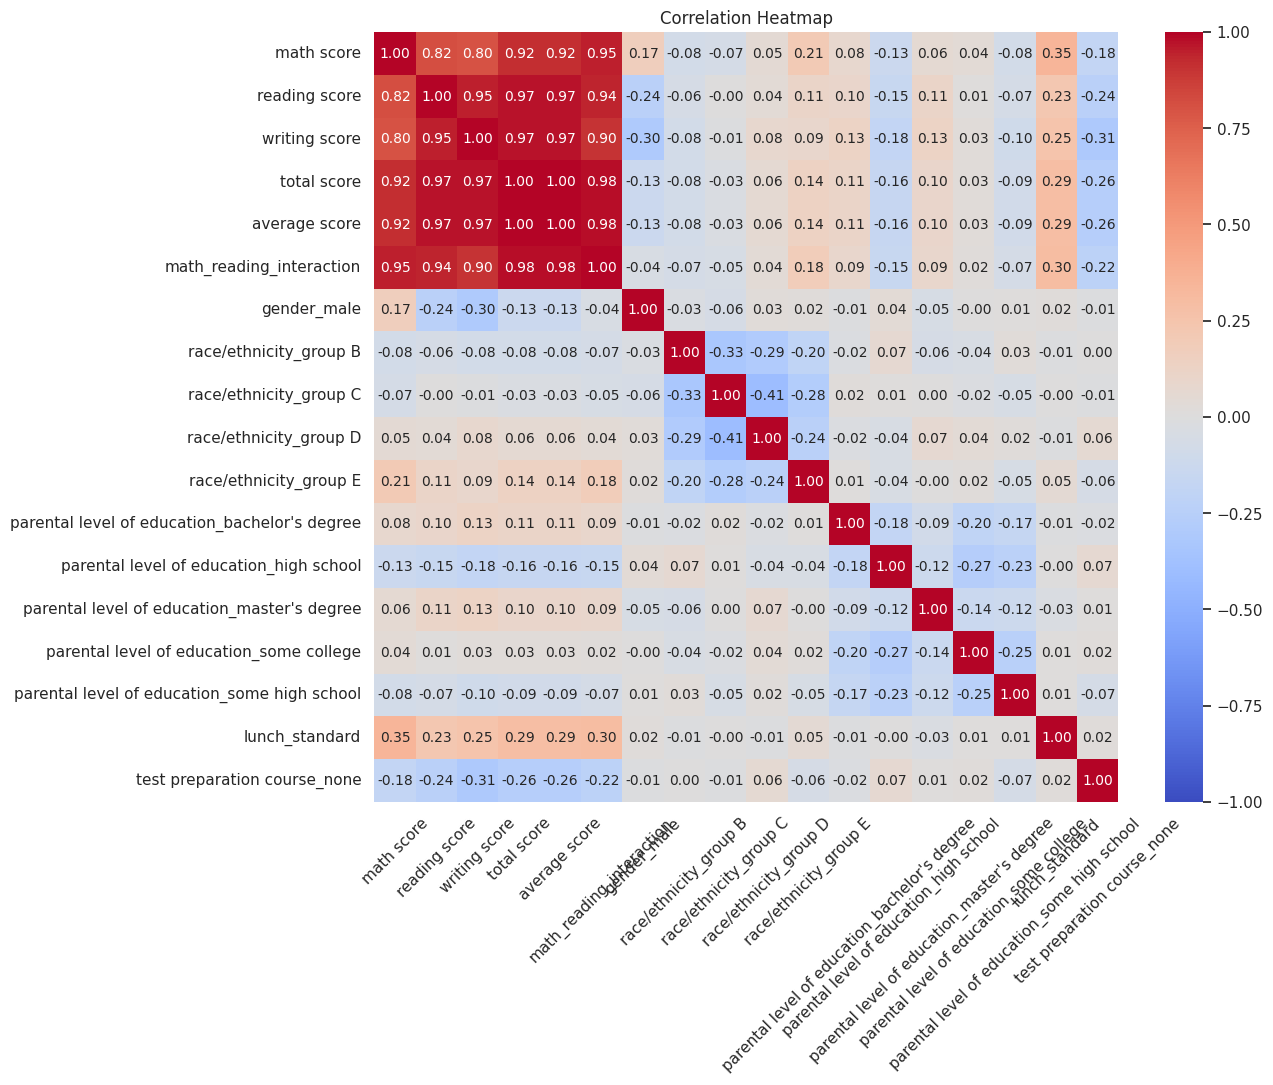

In [47]:
# Round the correlation coefficients to 2 decimal places
correlation_matrix_rounded = correlation_matrix.round(2)

# Plot the correlation heatmap with adjusted size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


<ipython-input-24-6641c2bf70d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=df, palette='viridis')


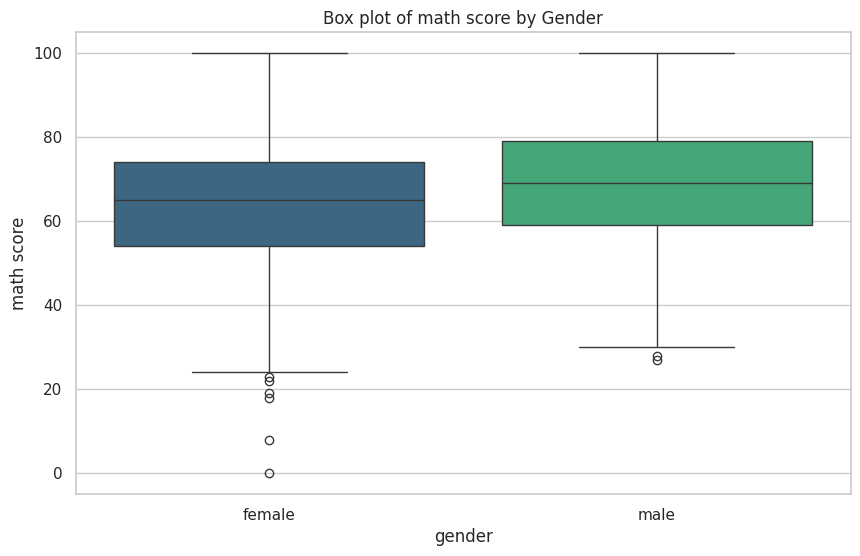

<ipython-input-24-6641c2bf70d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=df, palette='viridis')


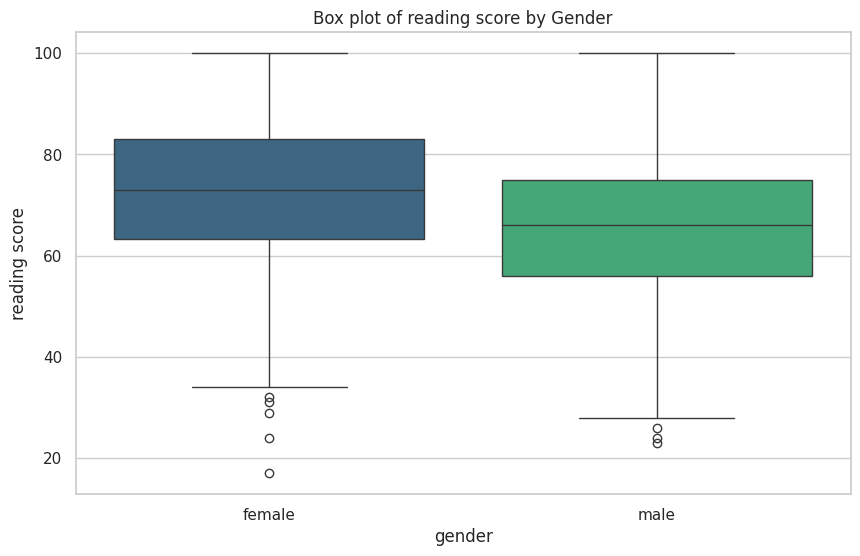

<ipython-input-24-6641c2bf70d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=df, palette='viridis')


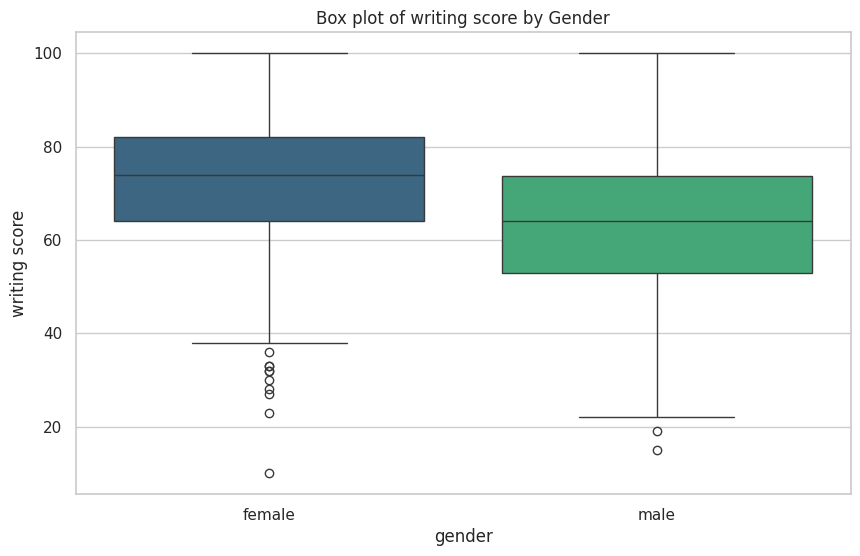

In [24]:
# Box plots of numerical scores grouped by gender
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gender', y=column, data=df, palette='viridis')
    plt.title(f'Box plot of {column} by Gender')
    plt.show()


<ipython-input-25-96a3a1c31eef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y=column, data=df, palette='viridis')


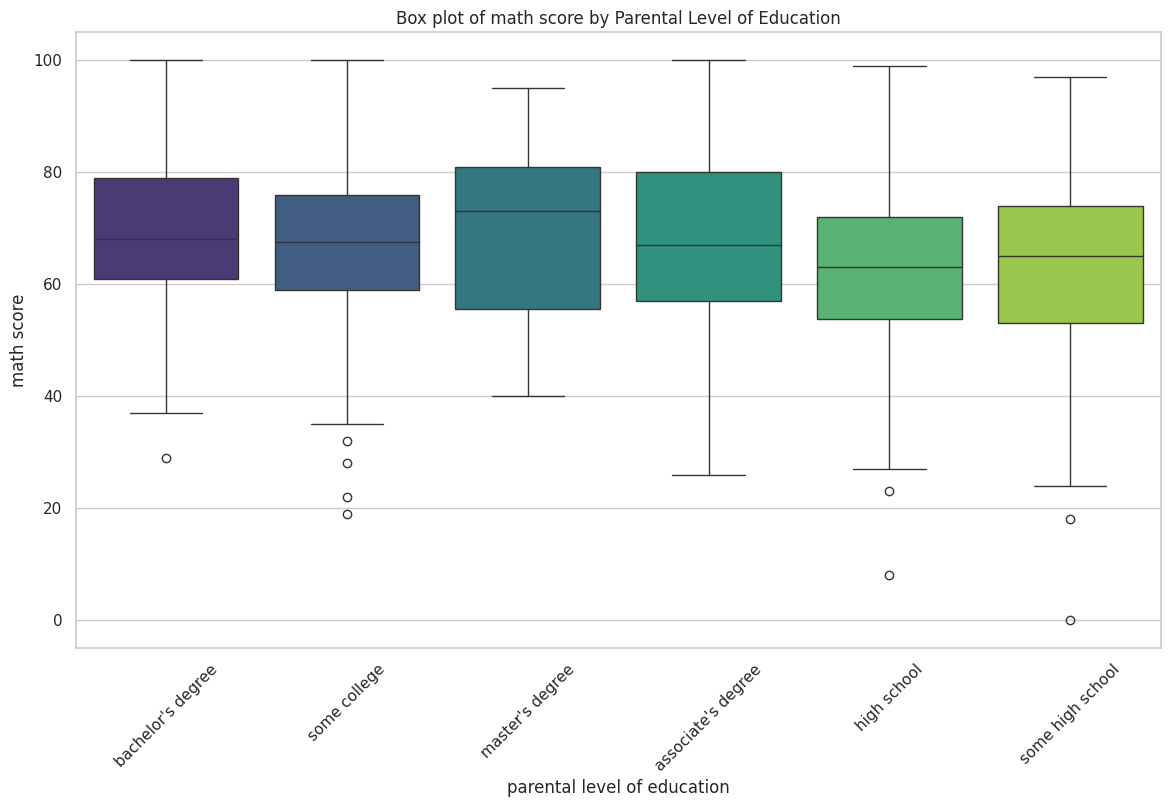

<ipython-input-25-96a3a1c31eef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y=column, data=df, palette='viridis')


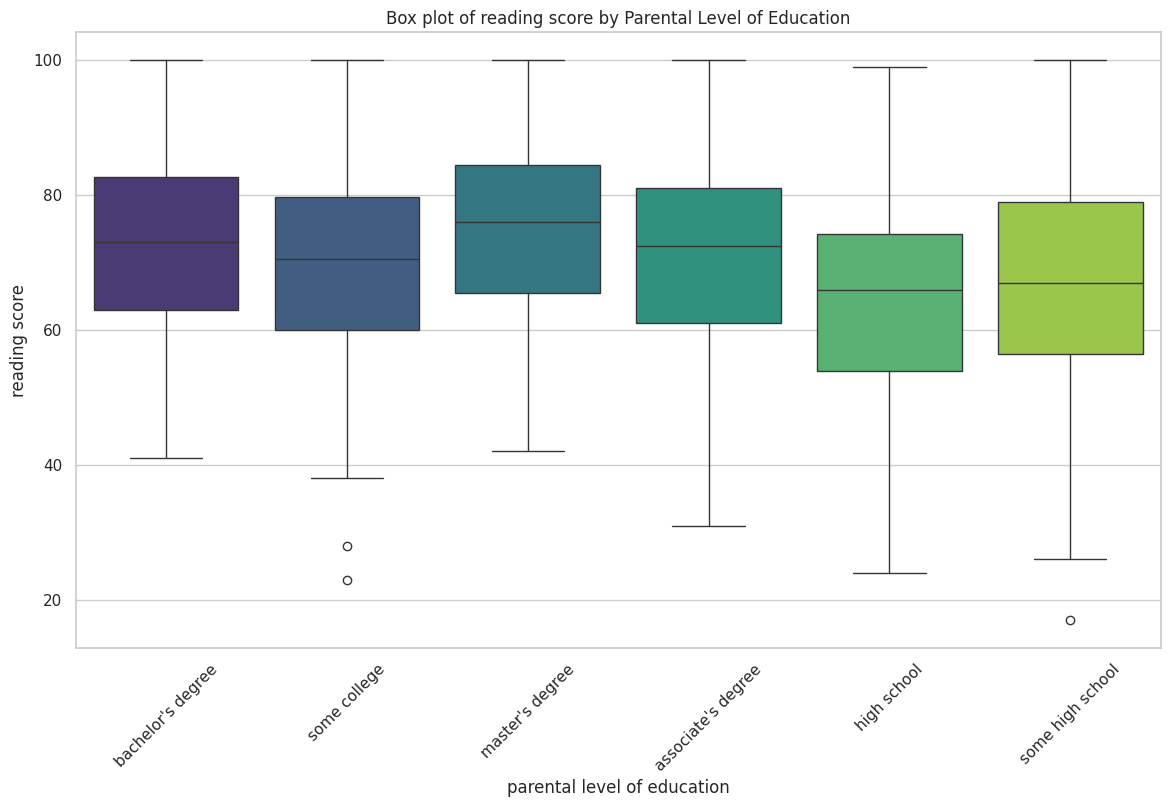

<ipython-input-25-96a3a1c31eef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y=column, data=df, palette='viridis')


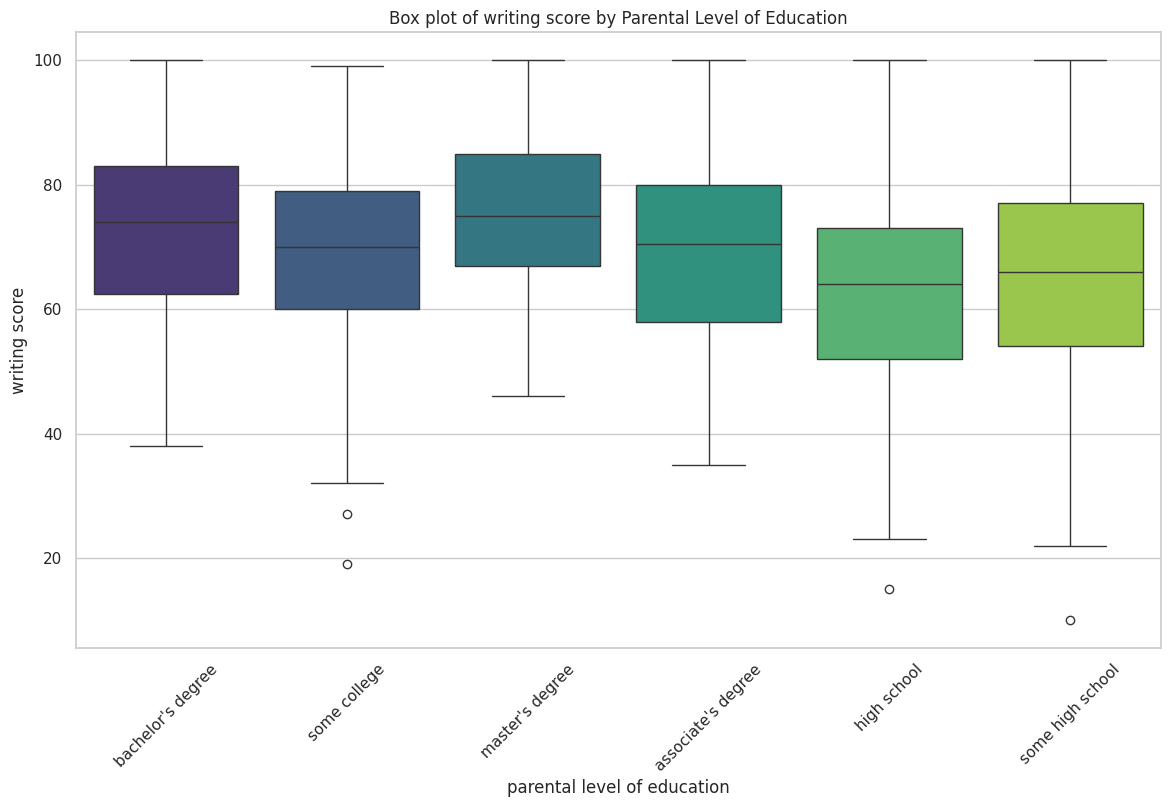

In [25]:
# Box plots of numerical scores grouped by parental level of education
for column in numerical_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='parental level of education', y=column, data=df, palette='viridis')
    plt.title(f'Box plot of {column} by Parental Level of Education')
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-26-7efef8b61348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=column, data=df, palette='viridis')


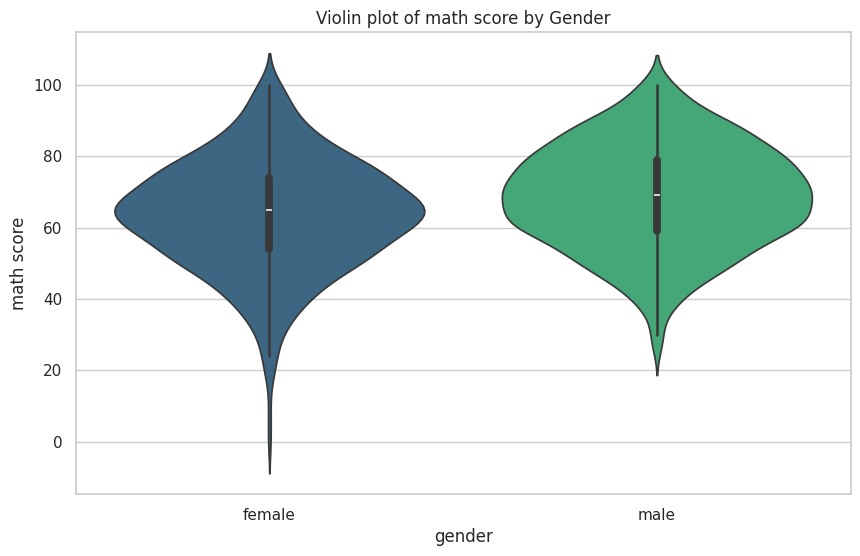

<ipython-input-26-7efef8b61348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=column, data=df, palette='viridis')


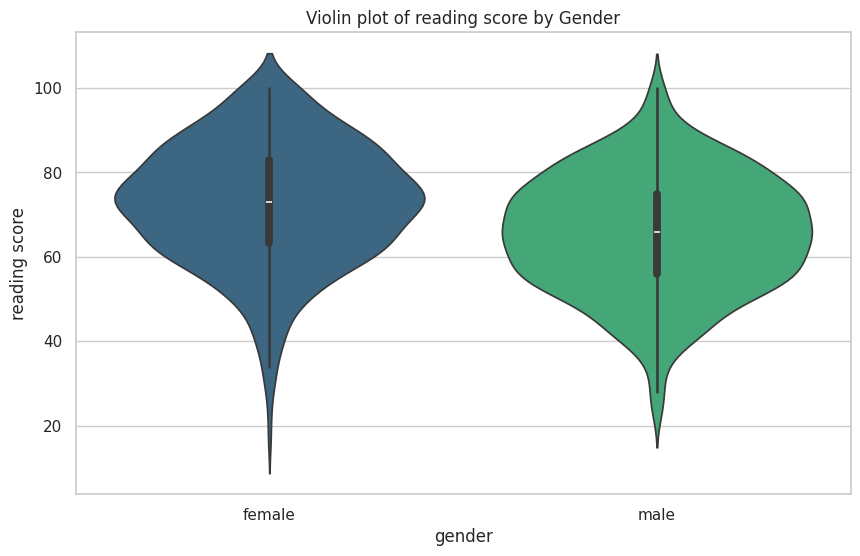

<ipython-input-26-7efef8b61348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=column, data=df, palette='viridis')


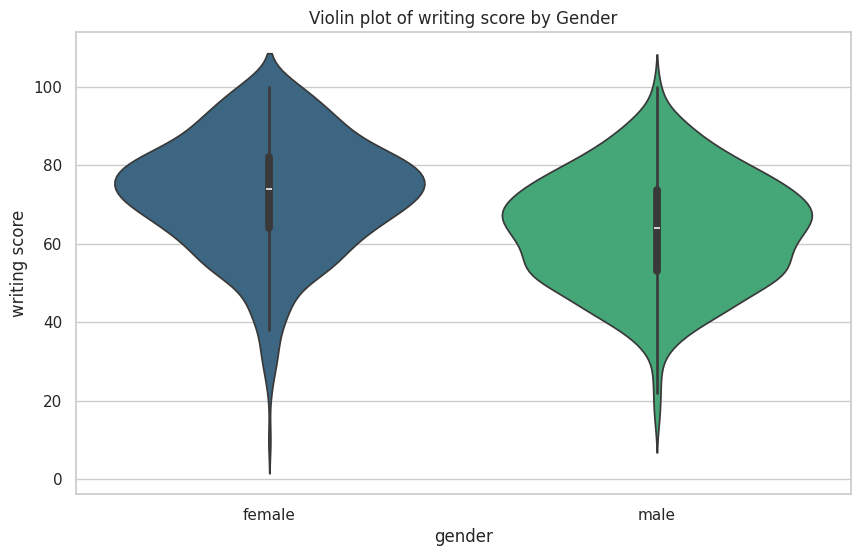

In [26]:
# Violin plots for numerical scores grouped by gender
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='gender', y=column, data=df, palette='viridis')
    plt.title(f'Violin plot of {column} by Gender')
    plt.show()


# Step 5: Analyzing Relationships Between Variables and Feature Selection

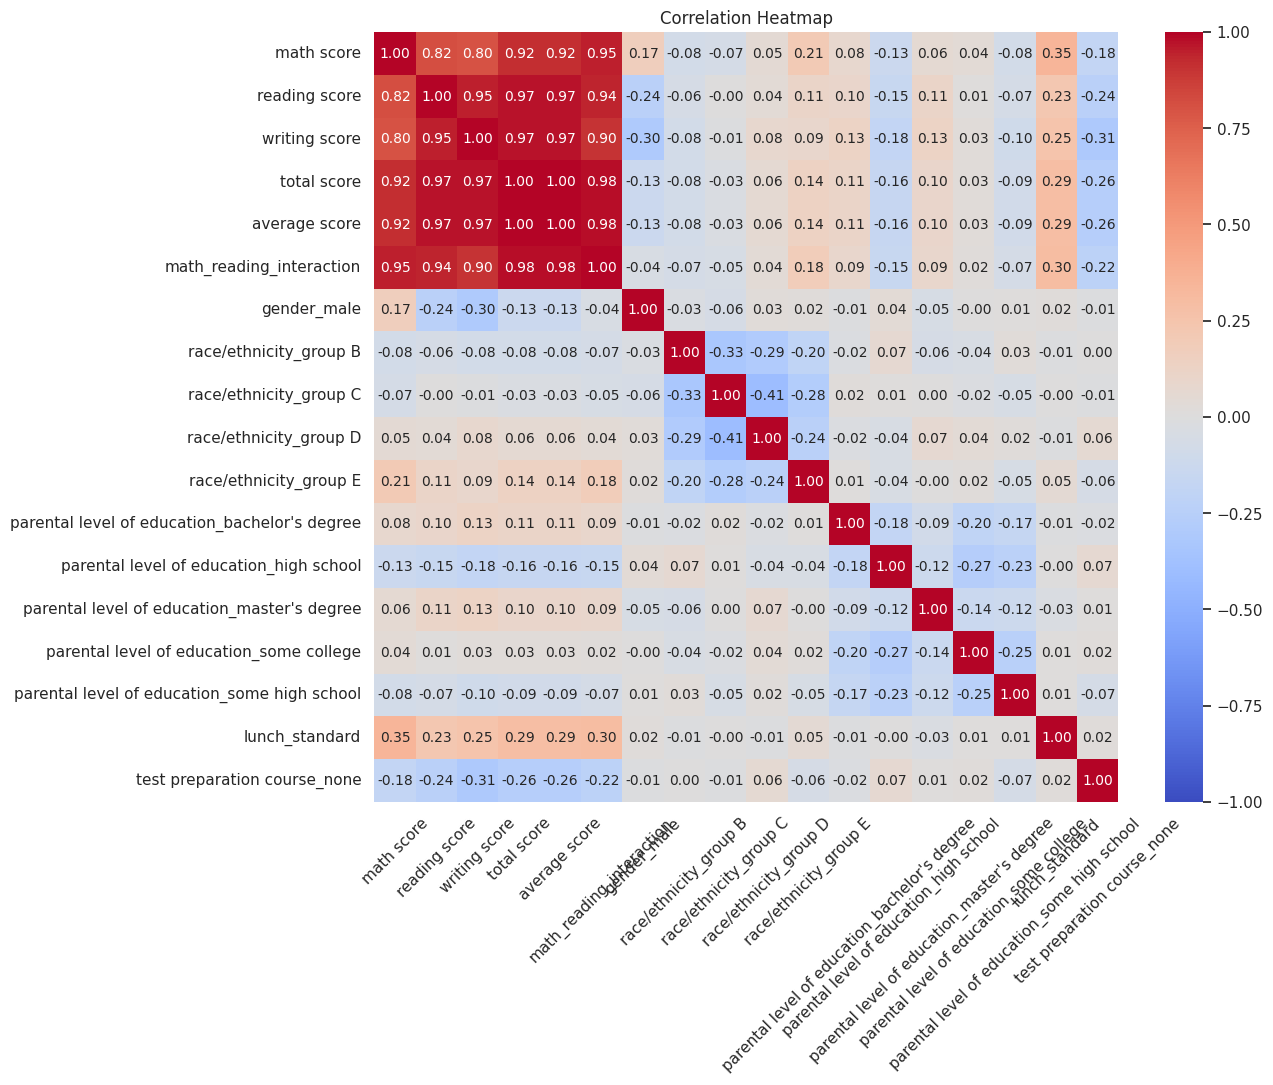

In [44]:
# Round the correlation coefficients to 2 decimal places
correlation_matrix_rounded = correlation_matrix.round(2)

# Plot the correlation heatmap with adjusted size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


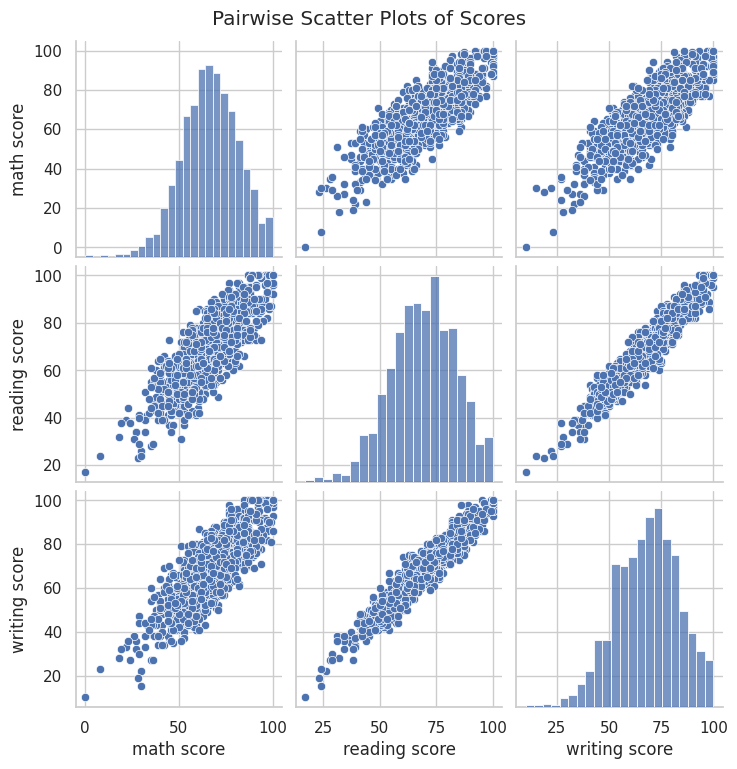

In [28]:
# Scatter plots for pairs of numerical columns
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Pairwise Scatter Plots of Scores', y=1.02)
plt.show()


<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


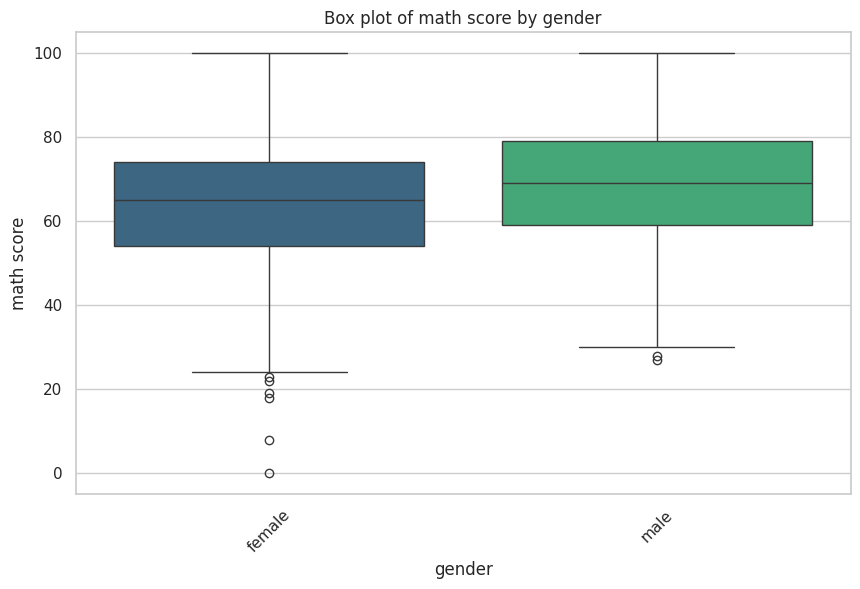

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


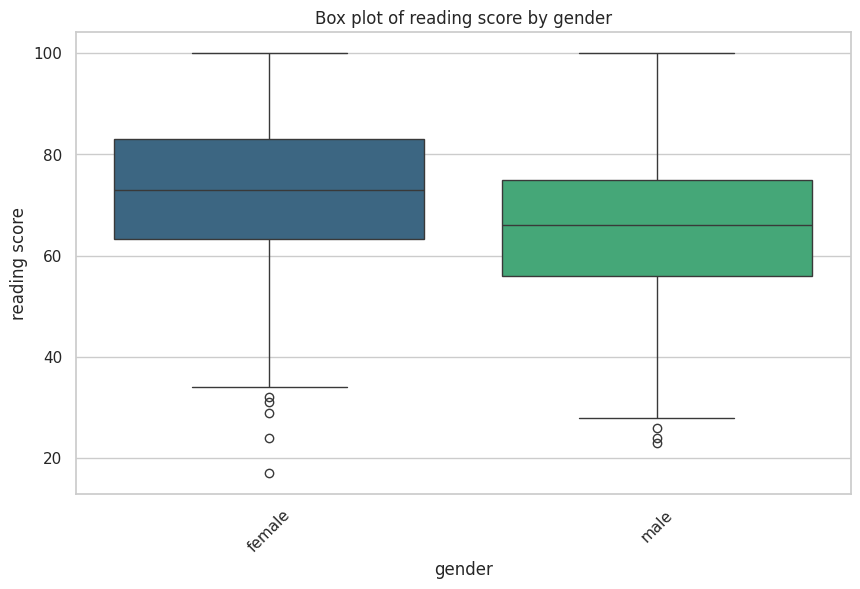

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


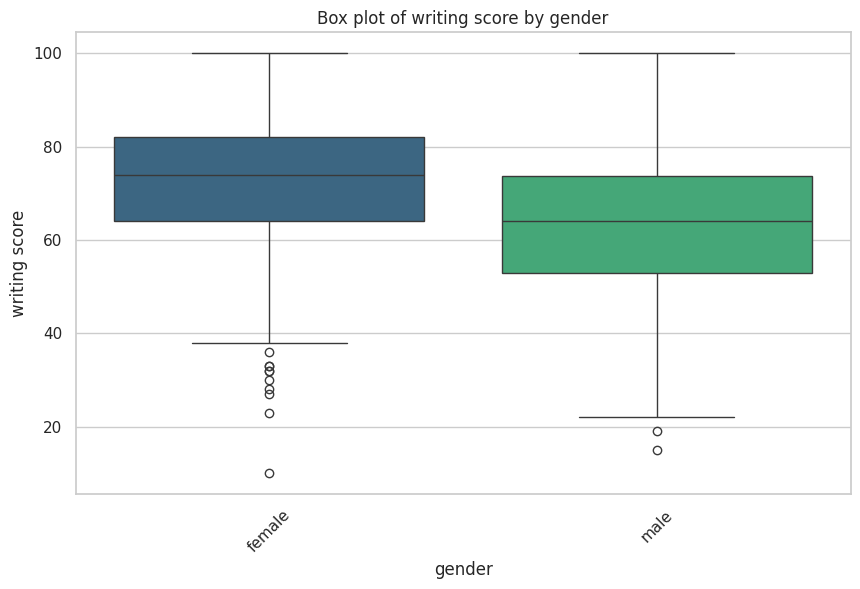

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


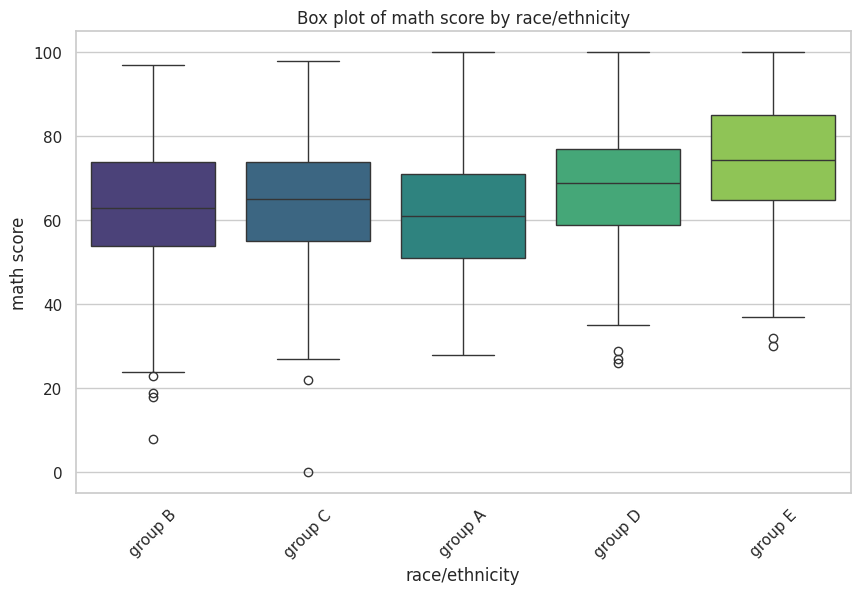

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


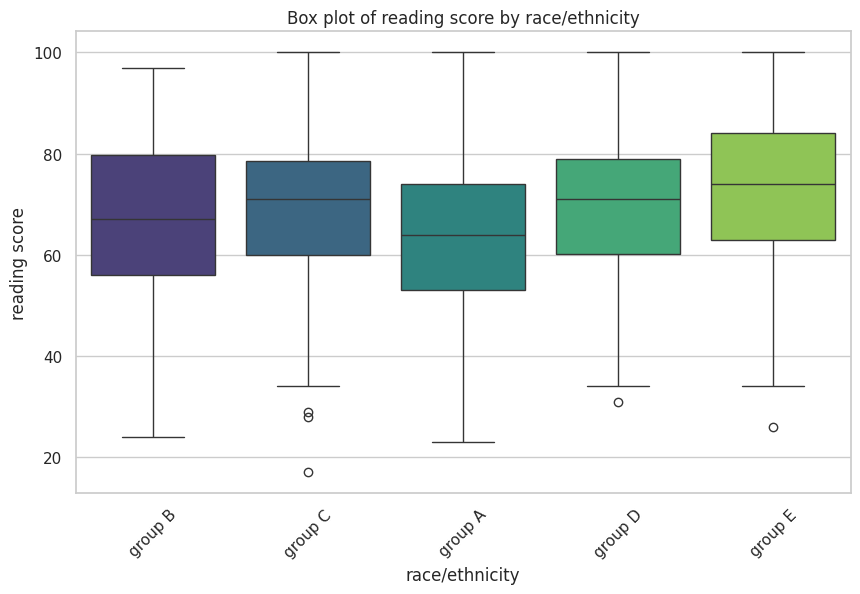

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


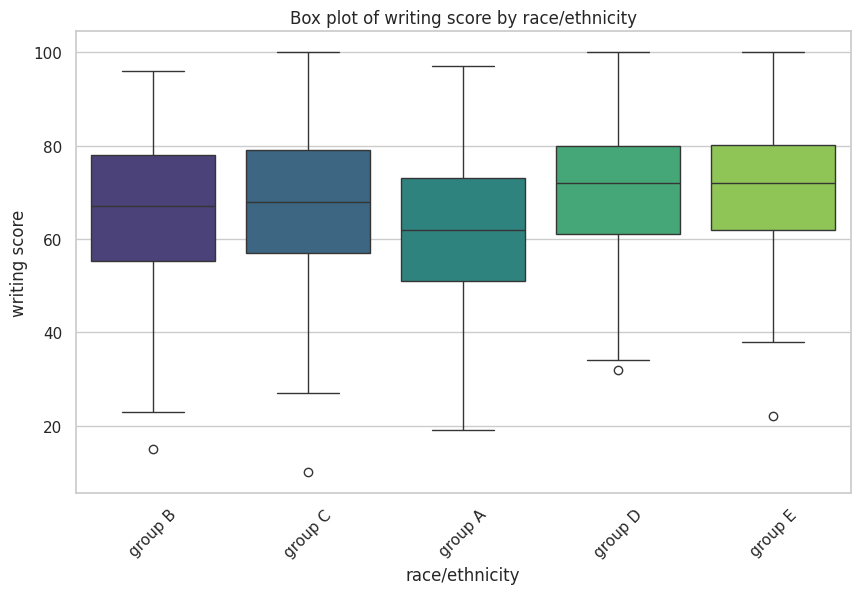

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


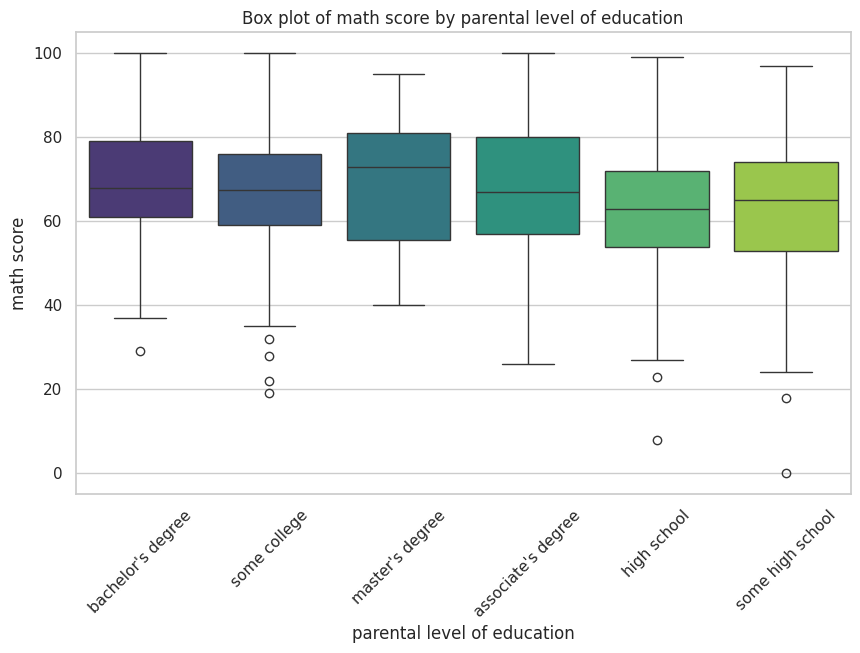

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


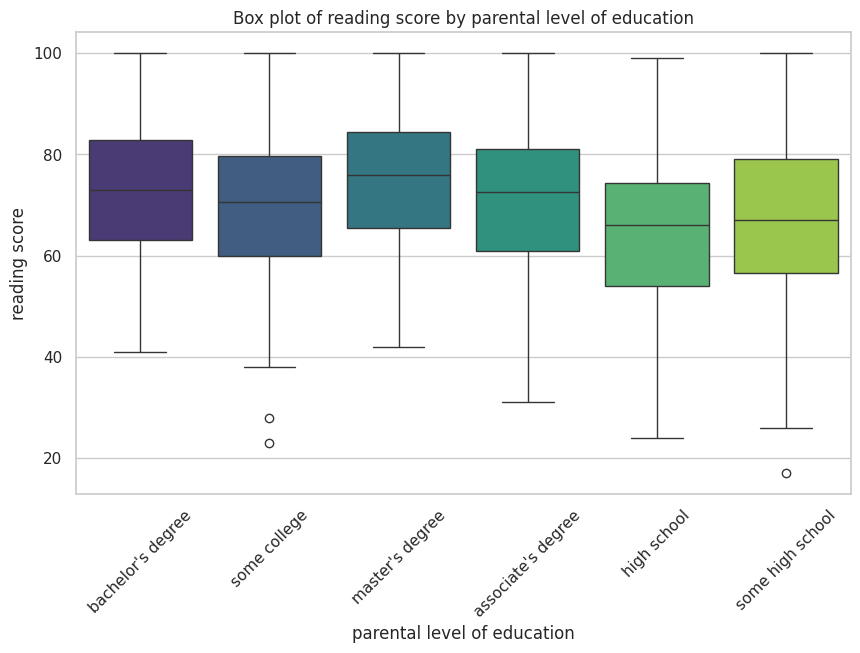

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


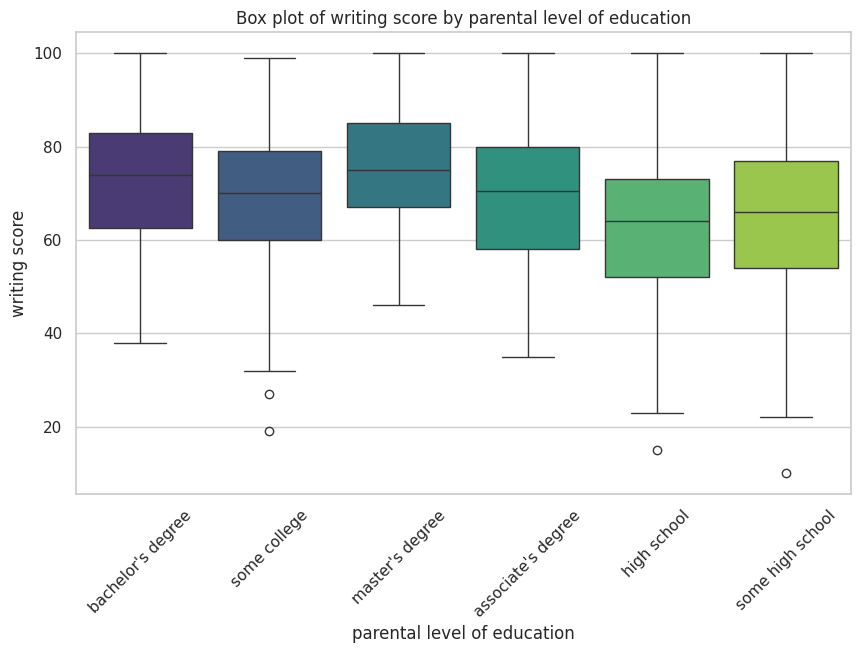

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


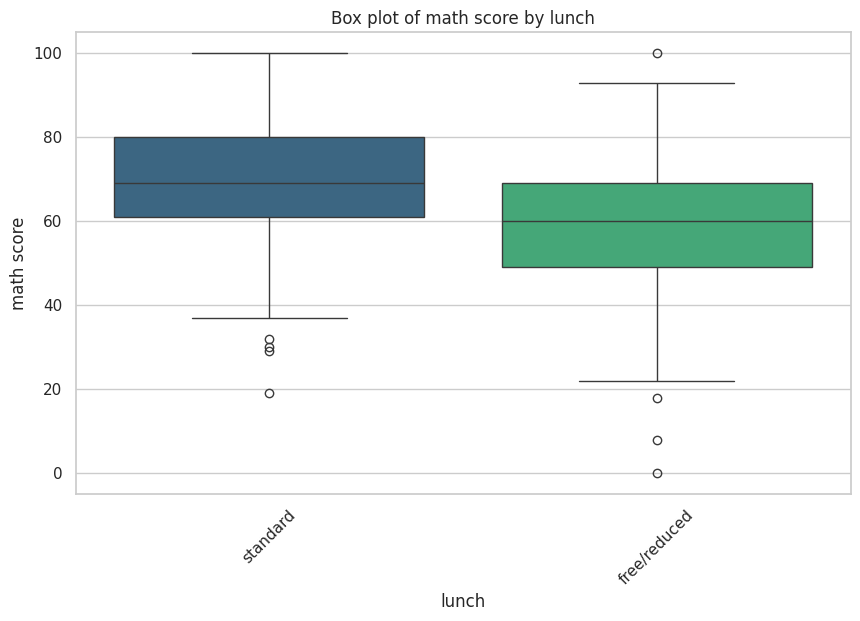

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


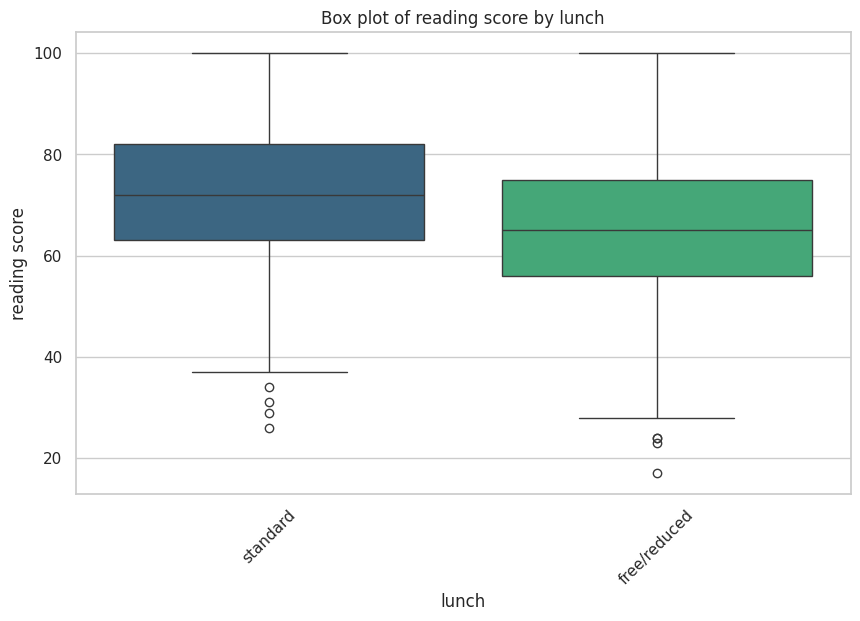

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


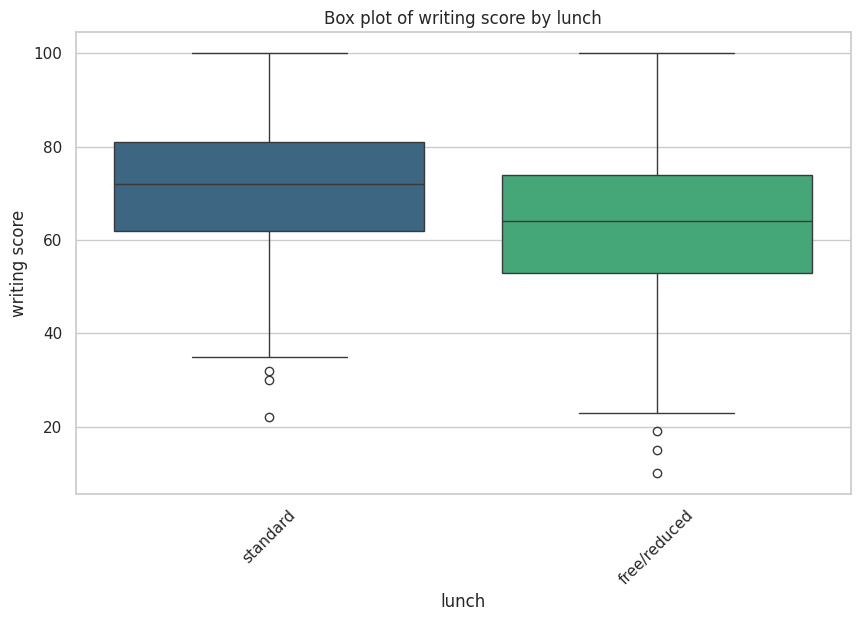

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


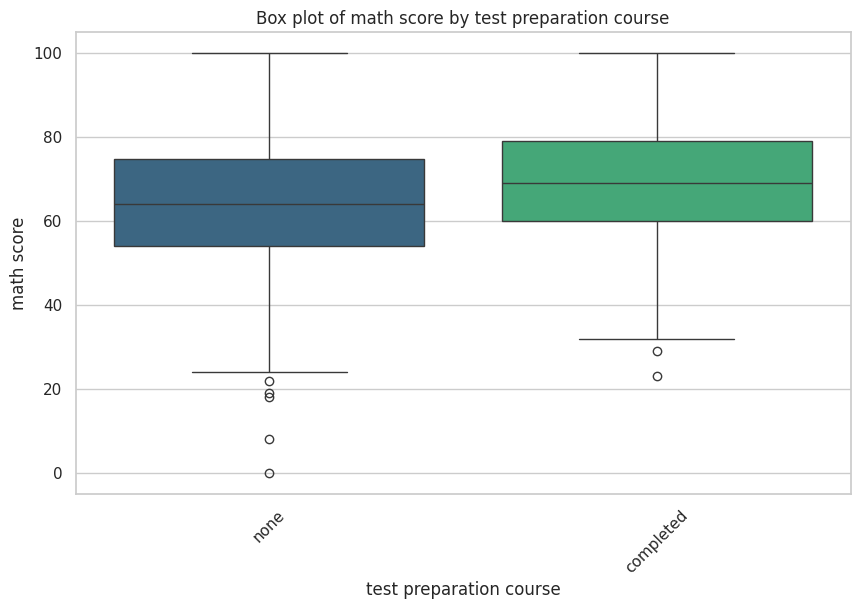

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


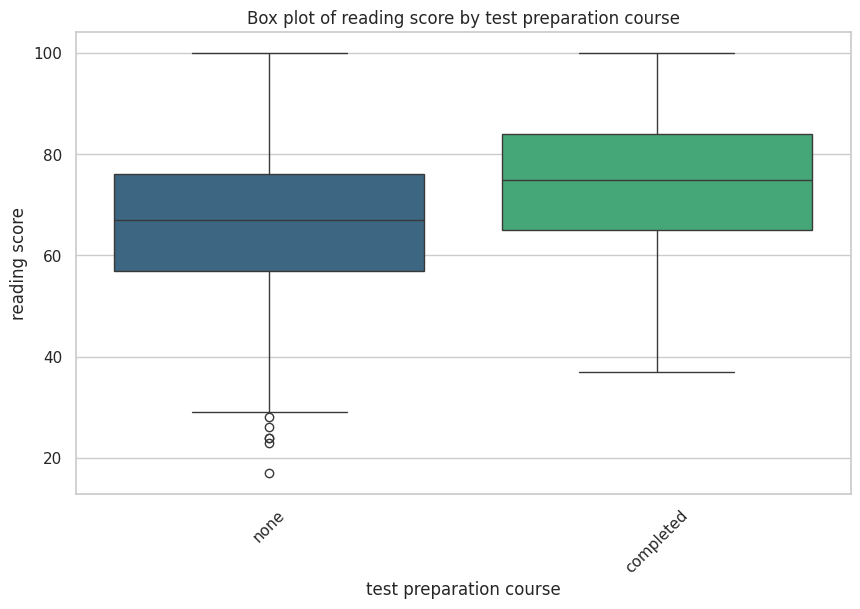

<ipython-input-29-fa7402c2ac59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=num_col, data=df, palette='viridis')


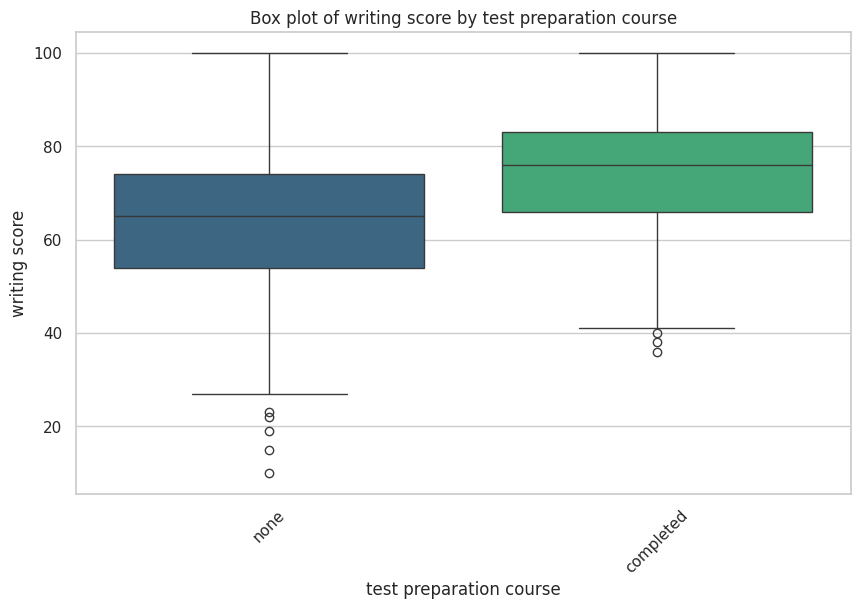

In [29]:
# Box plots of numerical scores grouped by categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for column in categorical_columns:
    for num_col in ['math score', 'reading score', 'writing score']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y=num_col, data=df, palette='viridis')
        plt.title(f'Box plot of {num_col} by {column}')
        plt.xticks(rotation=45)
        plt.show()


In [39]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Select features based on correlation threshold
correlation_threshold = 0.3
strong_correlations = correlation_matrix[abs(correlation_matrix) > correlation_threshold]
print(strong_correlations)



                                               math score  reading score  \
math score                                       1.000000       0.817580   
reading score                                    0.817580       1.000000   
writing score                                    0.802642       0.954598   
total score                                      0.918746       0.970331   
average score                                    0.918746       0.970331   
math_reading_interaction                         0.945127       0.938641   
gender_male                                           NaN            NaN   
race/ethnicity_group B                                NaN            NaN   
race/ethnicity_group C                                NaN            NaN   
race/ethnicity_group D                                NaN            NaN   
race/ethnicity_group E                                NaN            NaN   
parental level of education_bachelor's degree         NaN            NaN   
parental lev

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# Convert categorical variables to numerical codes for feature selection
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['math score']  # Example target variable

# Apply SelectKBest to extract top features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                                          Feature     Score
10                                 lunch_standard  2.575421
4                          race/ethnicity_group E  1.782721
6         parental level of education_high school  1.280409
0                                     gender_male  1.181467
9    parental level of education_some high school  1.151713
8        parental level of education_some college  1.130523
11                   test preparation course_none  1.117646
1                          race/ethnicity_group B  1.073803
2                          race/ethnicity_group C  1.041150
3                          race/ethnicity_group D  0.957805
5   parental level of education_bachelor's degree  0.856770
7     parental level of education_master's degree  0.818360


# Step 6: Feature Engineering

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Separate numerical and categorical columns
numerical_columns = ['math score', 'reading score', 'writing score']
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Fill missing numerical values with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing categorical values with the mode
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())



Missing values before handling:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Missing values after handling:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [33]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[['math score', 'reading score', 'writing score']])

# Create a DataFrame to hold the Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=['math score', 'reading score', 'writing score'])

# Set a threshold for identifying outliers
threshold = 3

# Filter out the rows with outliers
df_cleaned = df[(z_scores_df < threshold).all(axis=1)]

# Verify the shape of the cleaned DataFrame
print(df_cleaned.shape)


(1000, 8)


In [34]:
# Create total score feature
df_cleaned['total score'] = df_cleaned['math score'] + df_cleaned['reading score'] + df_cleaned['writing score']

# Create average score feature
df_cleaned['average score'] = df_cleaned['total score'] / 3

# Display the first few rows with the new features
df_cleaned.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
# Create interaction feature: math score * reading score
df_cleaned['math_reading_interaction'] = df_cleaned['math score'] * df_cleaned['reading score']

# Display the first few rows with the new feature
df_cleaned.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,math_reading_interaction
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,5184
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,6210
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,8550
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,2679
4,male,group C,some college,standard,none,76,78,75,229,76.333333,5928


In [36]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to normalize
numerical_columns = ['math score', 'reading score', 'writing score', 'total score', 'average score', 'math_reading_interaction']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Display the first few rows with normalized features
df_cleaned.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,math_reading_interaction
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492,0.343574,0.343574,0.228840
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269,1.021927,1.021927,0.772495
2,female,group B,master's degree,standard,none,1.577711,1.770109,1.642475,1.747064,1.747064,2.012410
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744,-1.293830,-1.293830,-1.098506
4,male,group C,some college,standard,none,0.653954,0.605158,0.457333,0.600881,0.600881,0.623069


In [37]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,math score,reading score,writing score,total score,average score,math_reading_interaction,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,0.343574,0.343574,0.228840,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,1.021927,1.021927,0.772495,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,1.747064,1.747064,2.012410,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,-1.293830,-1.293830,-1.098506,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,0.600881,0.600881,0.623069,True,False,True,False,False,False,False,False,True,False,True,True
